посторение пути из точки B в тчоку E:
B->A->E


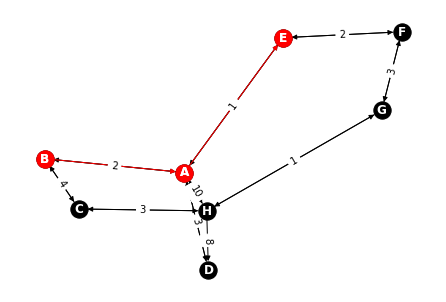

In [4]:
import math
import networkx as nx
import matplotlib.pyplot as plt

def mat(z,alf):#создание списка кортеджей которая всебе хранит растоянния от вершин
    v = []
    for k in z:
        v.append(k.split())
    n = len(v)
    path = []
    for i in range(n):
        for ii in range(n):
            if v[i][ii] =="0" or v[i][ii] == '-':
                pass
            else:
                path.append((alf[i].upper(),alf[ii].upper(),v[i][ii]))
    return path

def matric(rez,alf,path):#создание списка кортеджей длин наименьшего пути
    path_m = []
    for i in range(len(rez)-1):
        for ii in path:
            if ii[0] == alf[rez[i]-1].upper() and ii[1] == alf[rez[i+1]-1].upper():
                path_m.append((alf[rez[i]-1].upper(),alf[rez[i+1]-1].upper(),ii[2]))
    return path_m

def floyd_algorithm(V,n,start,end):# создание матрицы из всех возможных путей
    p = [[v for v in range(n)]for u in range(n)]# начальный список предыдущих вершин для поиска кратчайшего пути
    for k in range(n):
        for i in range(n):
            for j in range(n):
                d = V[i][k]+V[k][j]
                if V[i][j]>d:
                    V[i][j] = d
                    p[i][j] = k# номер промежуточной вершины при движении от i до j
    r = get_path(p,end-1,start-1)
    r.reverse()
    return r

def get_path(P,u,v):# алгорит нахождения наименьшего пути
    path = [u+1]
    while u!=v:
        u = P[u][v]
        path.append(u+1)
    return path



def graf(path,rezMatrix):# отрисовка графа
    G = nx.DiGraph() 
    M = nx.DiGraph()
    E = path
    Er=rezMatrix
    G.add_weighted_edges_from(E)
    M.add_weighted_edges_from(Er)
    pos=nx.spring_layout(G)
    
    nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
    nx.draw(M, pos, with_labels=True, font_weight='bold',font_color='white',node_color='red',edge_color='red')
    
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    plt.show()    

alf = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
f = open("mas.txt", "r",encoding='utf-8')
V = []
z = []
for i in f:
    z.append(i)
f.close()
path = mat(z,alf)
for i in z:
    k = i.split()
    o = []
    for ii in k:
        if ii == "-":
            o.append(math.inf)
        else:
            o.append(int(ii))
    V.append(o)
    o = []

n = len(V)#число вершин в графе
s = "B"
e = "E"
start = alf.index(s.lower())+1# начальная вершина
end = alf.index(e.lower())+1#конечная вершина
rez = floyd_algorithm(V,n,start,end)

put = ""

print(f'посторение пути из точки {alf[start-1].upper()} в тчоку {alf[end-1].upper()}:')
for i in rez:
    put += alf[i-1].upper()+"->"
print(put[:-2])
rezMatrix = matric(rez,alf,path)
graf(path,rezMatrix)